In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\SUVARCHALA\\Downloads\\Dataset .csv")

In [3]:
# Step 1: Extract additional features
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)
df['Has Table Booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online Delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)


In [4]:
# Select relevant features and target variable
features = ['Restaurant Name Length', 'Address Length', 'Has Table Booking', 'Has Online Delivery',
            'Average Cost for two', 'Price range', 'Votes']
target = 'Aggregate rating'

In [5]:
# Handle missing values if any
df = df.dropna(subset=features + [target])

In [6]:
# Convert categorical features to numerical
df = pd.get_dummies(df, columns=['Country Code', 'City', 'Cuisines', 'Currency'], drop_first=True)


In [7]:
# Split the dataset into features (X) and target (y)
X = df[features]
y = df[target]


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Linear Regression**

In [10]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [11]:
# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')

Linear Regression - MSE: 1.6775321117485151, R2: 0.2629825202173556


**Decision Tree classifier**

In [12]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree Regressor
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree Regressor - MSE: {mse_dt}, R2: {r2_dt}')

Decision Tree Regressor - MSE: 0.21165750915750914, R2: 0.907009062369755


**Random forset Regressor**

In [13]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regressor - MSE: {mse_rf}, R2: {r2_rf}')


Random Forest Regressor - MSE: 0.11050560744378302, R2: 0.9514497733130268


**compare the performance of Different Models**

In [14]:
# Compare the performance of different models
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'R2': [r2_lr, r2_dt, r2_rf]
})

print(model_performance)

               Model       MSE        R2
0  Linear Regression  1.677532  0.262983
1      Decision Tree  0.211658  0.907009
2      Random Forest  0.110506  0.951450


**Nodel Performance Comparsion MSE**

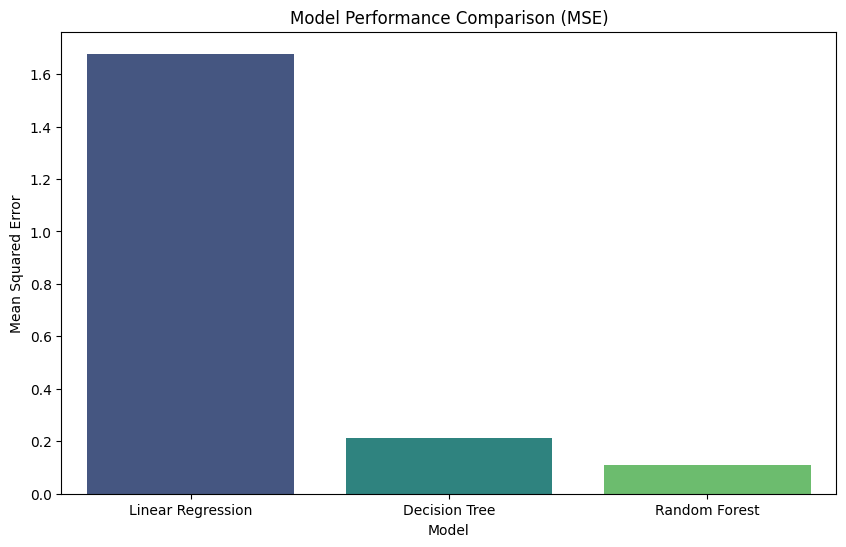

In [15]:
# Plot the performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=model_performance, palette='viridis')
plt.title('Model Performance Comparison (MSE)')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

**Model Performance Comparsion R2**

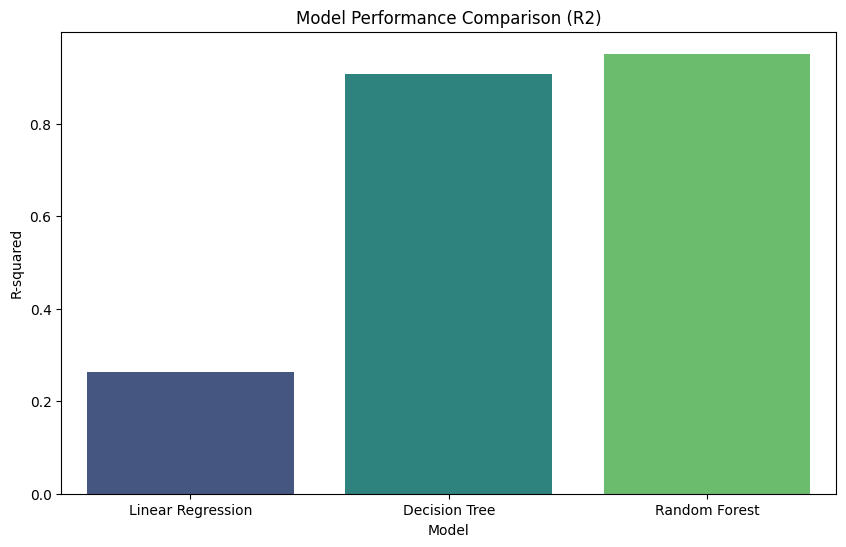

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2', data=model_performance, palette='viridis')
plt.title('Model Performance Comparison (R2)')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.show()